# **Relatório 03 - Métodos de Integração Numérica**
##### **Gabriel van Loon Bodê da Costa Dourado Fuentes Rojas**
##### **SME0104 - Cálculo Numérico**
##### **Docente: Cynthia de Oliveira Lage Ferreira** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Resumo do Relatório**

Neste relatório iremos implementar os métodos de integração numérica visto em aula e comparar seus resultados ao integrar diferentes tipos de funções. Primeiramente iremos criar todos os métodos, relembrando um pouco de seus embasamentos teóricos para, em seguida, darmos prosseguimentos às comparações.


# **Método: Regra do Ponto Médio**

A regra do ponto médio é um método simples em que, dado uma $f(x)$ **conhecida** e contínua no intervalo $[a,b] \in \mathbb{R}$, podemos calcular a integral dividindo $[a,b]$ em $N$ intervalos de mesmo comprimento $h$ e tal que $x_0 = a$ e $x_n = b$. 

Feito isso, para cada segmento $x_i$, $x_{i+1}$, calculamos o ponto médio $\bar x = \dfrac{x_i + x_{i+1}}{2}$ e somamos à área do retângulo formado por $S_i = \bar x \times h$ ao valor total da integral.

A seguir temos uma implementação da regra do ponto médio `integral_ponto_medio` em que o usuário informa a $f(x)$, o intervalo $[a,b]$ e em quantos segmentos $N$ pretende dividir o intervalo.


In [ ]:
def integral_ponto_medio(f,a,b,N):
  x = np.linspace(a,b,N+1);
  x = (x[:-1] + x[1:])/2
  h  = x[1] - x[0]
  return np.sum(np.vectorize(f)(x)) * h

# **Fórmulas de Newton-Cotes**

Seja uma $f(x)$ conhecida OU um conjunto $X$ formato por $(N+1)$ pontos igualmente espaçados tais que $X = \{ (x_0,y_0), (x_1,y_1), ..., (x_n,y_n) \}$, queremos calcular a integral de $f$ no intervalo $[x_0, x_n] = [a,b]$ por meio de uma aproximação de $f(x)$ com um polinômio $P_n(x)$. Ou seja:

\begin{equation}
\int_{a}^{b} f(x)dx = \int_{x_0}^{x_n} f(x)dx 
\approx  \int_{x_0}^{x_n} P_n(x) dx = \sum_{k=0}^{n} y_k \int_{x_0}^{x_n} l_k(x) dx
\end{equation}

O polinômio $P_n$ será obtido por meio de uma interpolação polinomial utilizando a forma de Lagrange e é dado por:

\begin{equation} 
P_n(x) = \sum_{k=0}^{n} y_k l_k(x)
\end{equation}

\begin{equation} 
l_k(x) = \prod_{j = 0,\space j \neq k}^{n} \dfrac{x-x_j}{x_k-x_j}
\end{equation}

O método, no entanto, utiliza uma mudança de variáveis para que o avanço dos pontos se dê de uma forma discreta. Fazendo então:

\begin{equation}
x = x_0 + ht \Rightarrow dx = hdt \\
x = x_0, t=0 \\
x = x_n, t=n 
\end{equation}

Ajustando $P_n$ para a nova variável, teremos então os seguintes ajustes na fórmula de $P_n(x)$ e $l_k(x)$.

\begin{equation} 
P_n(x_0 + ht) = \sum_{k=0}^{n} y_k l_k(x_0 + ht) = \sum_{k=0}^{n} y_k \prod_{j = 0,\space j \neq k}^{n} \dfrac{(x_0 + ht)-(x_0 + hj)}{(x_0 + hk)-(x_0 + hj)}
\end{equation}

\begin{equation} 
l_k(x+0 + ht) = \lambda_k(t) = \prod_{j = 0,\space j \neq k}^{n} \dfrac{t-j}{k-j} 
\end{equation}

No fim, nossa fórmula de Newton-Cotes será a seguinte:

\begin{equation} 
\int_{x_0}^{x_n} f(x)dx \approx \sum_{k=0}^{n} y_k h \int_{0}^{n} \lambda_k(t) dt = \sum_{k=0}^{n} y_k h C_k^n 
\end{equation}

em que $C_k^n$ representa a integral $\int_{0}^{n} \lambda_k(t) dt$ que irá variar conforme alteramos o grau do polinômio $n$ que queremos usar de aproximação para $f$.


# **Regra do Trapézio (Newton-Cotes com $n$ = 1)**

Aproximando $f(x)$ por um polinômio de grau $1$, teremos os seguintes resultados

\begin{equation} 
\int_{x_0}^{x_1} f(x)dx \approx = \sum_{k=0}^{1} y_k h C_k^1 = y_0 h C_0^1 + y_1 h C_1^1 
\end{equation}

\begin{equation} 
C_0^1 = \int_{0}^{n} \lambda_0(t) dt = \int_{0}^{n} \dfrac{(t-1)}{0-1} dt = \dfrac{1}{2} \\
C_1^1 = \int_{0}^{n} \lambda_1(t) dt = \int_{0}^{n} \dfrac{(t-0)}{1-0} dt = \dfrac{1}{2} \\
\\
\Rightarrow \int_{x_0}^{x_1} f(x)dx \approx \dfrac{h}{2}(y_0 + y_1)
\end{equation}

Teremos portanto, que a aproximação de $f(x)$ no intervalo $[x_a,x_b]$ por um polinômio de grau 1 pode ser dada pela área do trapézio dada pela equação $\dfrac{h}{2}(f(x_a) + f(x_b))$.

Podemos, portanto, separar $[a,b]$ em $N$ segmentos de tamanho $h$ e calcular a integral somando as áreas dos trapézios em cada intervalo. O método a seguir (`integral_NC_trapezio`) implementa o que foi visto até aqui.

In [ ]:
def integral_NC_trapezio(f,a,b,N):
  f_vec = np.vectorize(f)
  x  = np.linspace(a,b,N+1);
  y  = f_vec(x)
  h  = x[1] - x[0]

  return np.sum( ((y[:-1] + y[1:]) * h / 2) )

# **Regra do 1/3 de Simpson (Newton-Cotes com $n$ = 2)$**

Análogo ao método do trapézio, podemos aproximar $f$ em um intervalo $[x_0,x_2]$ com um polinômio de grau 2, gerando então a seguinte fórmula para ser resolvida:

\begin{equation}  
\int_{x_0}^{x_2} f(x)dx \approx = \sum_{k=0}^{2} y_k h C_k^1 = y_0 h C_0^2 + y_1 h C_1^2 + y_2 h C_2^2
\end{equation}

Fazendo o mesmo processo de cálculo das integrais $C_k^2$ iremos chegar na respectiva fórmula:

\begin{equation}  
\int_{x_0}^{x_2} f(x)dx \approx = \dfrac{h}{3}(y_0 + 4y_1 + y_2)
\end{equation}

Assim como no modo anterior, esse método irá aproximar $f(x)$ por um polinômio que passa pelos três pontos $y_0$, $y_1$ e $y_2$ e permitindo calcular a integral de $f(x)$ ao separar $[a,b]$ em $N$ segmentos de $3$ em $3$ pontos, somando os resultados obtidos no valor total da integral. 


In [ ]:
def integral_NC_1_3_Simpson(f,a,b,N):
  f_vec = np.vectorize(f)
  x  = np.linspace(a,b,2*N+1);
  y  = f_vec(x)
  h  = x[1] - x[0]

  integral = 0.0
  i        = 0
  while i < (2*N):
    integral += (h / 3) * (y[i] + 4*y[i+1] + y[i+2])
    i        += 2 
  return integral

# **Regra do 3/8 de Simpson (Newton-Cotes com $n = 3$)**

Novamente igual ao trapézio, estamos aproximando $f(x)$ por um polinômio com grau $3$ e separando em $N$ seguimentos contendo $4$ pontos $x_i$ em cada.

\begin{equation}  
\int_{x_0}^{x_3} f(x)dx \approx = \dfrac{3h}{8}(y_0 + 3y_1 + 3y_2 + y_3)
\end{equation}


In [ ]:
def integral_NC_3_8_Simpson(f,a,b,N):
  f_vec = np.vectorize(f)
  x  = np.linspace(a,b,3*N+1);
  y  = f_vec(x)
  h  = x[1] - x[0]

  integral = 0.0
  i        = 0
  while i < (3*N):
    integral += (3*h/8) * (y[i] + 3*y[i+1] + 3*y[i+2] + y[i+3])
    i        += 3
  return integral

**Obs:** Nas situações em que há apenas o conjunto de dados e não se sabe a função $f(x)$, é necessário que os pontos sejam espaçados igualmente e, ao utilizar métodos com $n > 1$, é necessário garantir também que a quantidade de dados tenha a multiplicidade correta para que todos os segmentos tenham a quantidade necessária de pontos (*Ex: 1/3 Simpson necessita de $2N+1$ pontos*).

A seguir temos o teste das funções acima em alguns polinômios e comparámos com a função de integração da biblioteca `scipy.integrate`

In [ ]:
def teste_metodos(f,a,b,N):
  best = integrate.quad(f,a,b)[0]
  ponto_medio = integral_ponto_medio(f,a=a,b=b,N=N)
  NC_trapezio = integral_NC_trapezio(f,a=a,b=b,N=N)
  NC_1_3 = integral_NC_1_3_Simpson(f,a=a,b=b,N=N)
  NC_3_8 = integral_NC_3_8_Simpson(f,a=a,b=b,N=N)

  print("scipy.int:\t{:.6f}\tErro:\t{:.8f}".format(best, 0.0) )
  print("ponto médio:\t{:.6f}\tErro:\t{:.8f}".format(ponto_medio, abs(ponto_medio - best)))
  print("trapézios:\t{:.6f}\tErro:\t{:.8f}".format(NC_trapezio, abs(NC_trapezio - best)))
  print("1/3 Simpson:\t{:.6f}\tErro:\t{:.8f}".format(NC_1_3, abs(NC_1_3 - best)))
  print("3/8 Simpson:\t{:.6f}\tErro:\t{:.8f}".format(NC_3_8, abs(NC_3_8 - best)))

Fazendo: $f(x) = 5x + 5$

In [ ]:
f = lambda x: 5*x + 5
teste_metodos(f,0,10, 10)

scipy.int:	300.000000	Erro:	0.00000000
ponto médio:	300.000000	Erro:	0.00000000
trapézios:	300.000000	Erro:	0.00000000
1/3 Simpson:	300.000000	Erro:	0.00000000
3/8 Simpson:	300.000000	Erro:	0.00000000


Fazendo: $f(x) = 22x^2 + 3x + 5$

In [ ]:
f = lambda x: 22*x**2 + 3*x + 5
teste_metodos(f,0,10, 10)

scipy.int:	7533.333333	Erro:	0.00000000
ponto médio:	7515.000000	Erro:	18.33333333
trapézios:	7570.000000	Erro:	36.66666667
1/3 Simpson:	7533.333333	Erro:	0.00000000
3/8 Simpson:	7533.333333	Erro:	0.00000000


Fazendo: $f(x) = 12x^3 -6x^2 - 2x + 900$

In [ ]:
f = lambda x: 12*x**3 - 6*x**2 - 2*x + 900
teste_metodos(f,0,10, 10)

scipy.int:	36900.000000	Erro:	0.00000000
ponto médio:	36755.000000	Erro:	145.00000000
trapézios:	37190.000000	Erro:	290.00000000
1/3 Simpson:	36900.000000	Erro:	0.00000000
3/8 Simpson:	36900.000000	Erro:	0.00000000


Fazendo: $f(x) = xe^x$

In [ ]:
f = lambda x: x*math.exp(x)
teste_metodos(f,0,10, 10)

scipy.int:	198239.192153	Erro:	0.00000000
ponto médio:	188481.468677	Erro:	9757.72347642
trapézios:	218042.964489	Erro:	19803.77233568
1/3 Simpson:	198335.300614	Erro:	96.10846095
3/8 Simpson:	198282.069320	Erro:	42.87716706


Fazendo: $f(x) = xe^x + 12x^3 - 6x^2 -2x + 900$

In [ ]:
f = lambda x: (x*math.exp(x) + 12*x**3 - 6*x**2 - 2*x + 900) / (x+1) 
teste_metodos(f,0,10, 100)

scipy.int:	25172.356807	Erro:	0.00000000
ponto médio:	25163.475856	Erro:	8.88095053
trapézios:	25190.121389	Erro:	17.76458264
1/3 Simpson:	25172.357701	Erro:	0.00089386
3/8 Simpson:	25172.357204	Erro:	0.00039734


Fazendo: $f(x) = 44 \sin(x) + 13 \cos(x)$

In [ ]:
f = lambda x: 44 * math.sin(x) + 13 * math.cos(x)
teste_metodos(f,0,10, 100)

scipy.int:	73.846873	Erro:	0.00000000
ponto médio:	73.877651	Erro:	0.03077851
trapézios:	73.785324	Erro:	0.06154932
1/3 Simpson:	73.846875	Erro:	0.00000256
3/8 Simpson:	73.846874	Erro:	0.00000114


Como podemos ver, conforme vamos utilizando polinômios de grau maior como aproximação, mais próximo é o valor da integral calculada de seu valor real. Vamos agora nos aprofundar em um dos métodos que não foi citado em aula mas que visa melhorar ainda mais o cálculo da integral.

# **Polinômios Ortogonais**

Polinômios ortogonais são polinômios da família $\{ \varphi_0, \varphi_1, ..., \varphi_n\}$ definidos em um intervalo $[a,b]$ e com **grau$(\varphi_n) = n$** tal que:

\begin{equation}
\langle \varphi_i, \varphi_j \rangle = \int_{a}^{b} W(x)[\varphi_i(x)\varphi_j(x)] dx = 0, se \space i \neq j 
\end{equation}

Sendo $W(x)$ a função **peso** continua em $[a,b]$ e sempre positiva.

Um conjunto de polinômios ortogonais possui as seguintes propriedades:

**1)** $\varphi_n$ é única

**2)** Seja $p \in P_n$, $p$ pode ser escrito como combinação linear dos elementos $\varphi_i$, pois são $LI$.

**3)** Se $p \in P_m$, com $m < n$, então $\langle \varphi_n, p \rangle = 0$

**4)** $\varphi_n$ possui $n$ raízes distintas dentro do intervalo $[a,b]$

# **Polinômios de Lagendre**

Os polinômios de lagendre constituem um conjunto de polinômios ortogonais no intervalo $[-1,1]$ e com a função peso $W(x) = 1$. Eles podem ser gerados por meio do **Processo de Ortogonalização de Gran-Schmidt** da base canônica de $P_n$ e possuem as 4 propriedades vistas acima.

# **Quadratura de Gauss**

A Quadratura de Gauss tem por objetivo discretizar o cálculo da integral de uma $f(x)$ em um número mínimo de pontos de tal forma que esses sejam ótimos e aproximem o resultado obtido do real o máximo possível.

Para isso, vamos utilizar a seguinte fórmula:

\begin{equation}
I_f = \int_{a}^{b}f(x)dx \approx \sum_{k=0}^{n} w_k f(\xi_k) 
\end{equation}

em que $w_k$ são chamados pesos e $\xi_k$ os nós (pontos ótimos).

Para garantir que a equação seja eficiente, queremos que, dado a escolha de $n$, a fórmula seja capaz de calcular com **exatidão** o valor da integral de uma $f \in P_{2n+1}$.



$\square$ Seja $n=1$ no intervalo $[-1,1]$, teremos então que $\sum_{k=0}^{1} w_k f(\xi_k)$ deve ser capaz de calcular com exatidão a integral de uma $f \in P_3$. Precisamos portanto determinar o valores de $\xi_k$ e $w_k$ que tornam a igualdade verdadeira.

\begin{equation}
f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 \\
\int_{1}^{-1}f(x)dx = \sum_{k=0}^{1} w_k f(\xi_k) = w_0f(\xi_0) + w_1f(\xi_1) 
\end{equation}

Pela propriedade das integrais, sabemos que:

\begin{equation}
\int_{-1}^{1}f(x)dx = \int_{-1}^{1}(a_0 + a_1x + a_2x^2 + a_3x^3)dx = a_0\int_{-1}^{1}1dx + a_1\int_{-1}^{1}xdx  + a_2\int_{-1}^{1}x^2dx  + a_3\int_{-1}^{1}x^3dx 
\end{equation}

Logo, se houverem $w_0$, $w_1$, $\xi_0$ e $\xi_1$ cuja solução seja exata para $f(x)=1$, $f(x) = x$, $f(x) = x^2$ e $f(x) = x^3$ então qualquer $p \in P_3$ também terá uma solução. Resolvendo o seguinte sistema teremos então:

\begin{cases} 
w_0 + w_1 = \int_{-1}^{1} 1dx = 2 \\ 
w_0 \xi_0 + w_1 \xi_1 = \int_{-1}^{1} xdx = 0 \\ 
w_0 \xi_0^2 + w_1 \xi_1^2 = \int_{-1}^{1} x^2dx = 2/3 \\ 
w_0 \xi_0^3 + w_1 \xi_1^3 = \int_{-1}^{1} x^3dx = 0 \\ 
\end{cases} 

Cuja solução será dada por $\{ w_0 = 1, w_1 = 1, \xi_0 = -1/\sqrt{3}, \xi_1 = 1/\sqrt{3}\}$

Logo, se $f(x)$ for um polinômio de grau$(f) = 2n+1$, existe um conjunto de $n$ pontos capaz de calcular o valor exato de  $f$. 

Mostramos o caso em que $n = 1$ e um procedimento semelhante pode ser usado para outros valores. Esses casos no entanto irão gerar sistemas ainda maiores e por isso não caberiam nesse contexto.

# **Quadratura de Gauss-Legendre**

Como haviamos visto nas técnicas de Newton-Cotes, as técnicas de integração se resumiam à aproximar uma dada $f(x)$ à um polinômio $p(x) \in P_m$ utilizando a interpolação polinomial de Lagrange. Sabemos também que a fórmula do erro dessa técnica de interpolação é dada por:

\begin{equation}
R_n(x) = f(x) - p(x) = \dfrac{f^{n+1}(c_x)}{(n+1)!} \prod_{i=0}^n (x - x_i)
\end{equation}

Sendo $\prod_{i=0}^n (x - x_i)$ as raízes do polinômio $p(x)$ encontrado pela interpolação. 

Passando a integral de ambos os lados, podemos tirar a fórmula de erro do cálculo da integral por meio da interpolação, tal que

\begin{equation}
E(f) = \int_a^b (f(x) - p(x)) dx = \int_a^b \dfrac{f^{n+1}(c_x)}{(n+1)!} \prod_{i=0}^n (x - x_i)
\end{equation}

Supondo que $f$ seja uma função polinomial de grau $m$ . Sabemos, por meio da fórmula acima, que o erro gerado pela interpolação de Lagrange será:

**a)** $R_n(x) = 0$, se $m \leq n$, pois $f^{(n+1)}(c_x) = 0$ 

**b)** $R_n(x) = \dfrac{f^{n+1}(c_x)}{(n+1)!} \prod_{i=0}^n (x - x_i)$, se $m > n$

Veja, no entanto, que ao invés de aproximarmos $f(x)$ por um polinômio qualquer, podemos aproximar $f(x)$ usando **Polinômios de Legendre** de grau $n$ e garantir que o cálculo da integral seja exato para polinômios de ordem até $(2n+1)$. Vejamos o porquê a seguir.

$\square$ Seja $f(x)$ um polinômio com **grau$(f) = m$**, iremos aproximar $f$ por um polinômio de Legendre de grau $(n+1$) com as raízes $\{ \xi_0, \xi_1, ..., \xi_n \}$ e calcular sua integral no intervalo $[-1,1]$. A forma de $\varphi_{n+1}(x)$ é dada então por:

\begin{equation}
\varphi_{n+1}(x) = a \prod_{k=0}^{n}(x - \xi_k), a \in \mathbb{R}
\end{equation}

Sabemos que o erro da aproximação de $f$ em $\varphi_{n+1}$ é dado pela seguinte fórmula:

\begin{equation}
E(f) = \int_{-1}^{1} (f(x) - \varphi_{n+1}(x))dx =  
\int_{-1}^{1} \dfrac{f^{(n+1)}(c_x)}{(n+1)!} \prod_{k=0}^{n}(x - \xi_k)dx =  
\int_{-1}^{1} \dfrac{f^{(n+1)}(c_x)}{(n+1)!} \dfrac{\varphi_{n+1}(x)}{a} dx 
\\ = a^{-1} \int_{-1}^{1} \dfrac{f^{(n+1)}(c_x)}{(n+1)!} \varphi_{n+1}(x) dx \space = (*)
\end{equation}

Vamos relembrar, no entanto, que a função peso dos polinômios de lagendre é dada por $W(x) = 1$, $\forall x \in [-1,1]$ e que a fórmula $(*)$ é um produto vetorial de um espaço de polinômios ortogonais tal que:

\begin{equation}
(*) = a^{-1} \int_{-1}^{1} W(x)\dfrac{f^{(n+1)}(c_x)}{(n+1)!} \varphi_{n+1}(x) dx = a^{-1} \langle \dfrac{f^{(n+1)}(c_x)}{(n+1)!} , \varphi_{n+1} \rangle
\end{equation}

Por fim, pela **propriedade 3** dos polinômios ortogonais, teremos que:

**a)** Se $m \leq 2n+1$, então o $grau(f^{(n+1)}) \leq n$ e, portanto $E(f) = \langle \dfrac{f^{(n+1)}(c_x)}{(n+1)!} , \varphi_{n+1} \rangle = 0$

Logo, enquanto a primeira forma garante uma precisão exata apenas para quando $m \leq n$, o uso da quadratura de Gauss-Lagendre garante que a aproximação do valor real da integral será melhor e exato para valores de $m \leq 2n+1$.

# **Utilizando a Quadratura de Gauss-Legendre**

Seja $f(x)$ uma função conhecida, iremos calcular a integral de $f(x)$ no intervalo $[-1,1]$ usando o método da Quadratura de Gauss-Legendre tal que:

\begin{equation}
\int_{-1}^1 f(x)dx \approx \sum_{k=0}^{n} w_k f(\xi_k)
\end{equation}

em que $\xi_k$ são as raízes do polinômio $\varphi_{n+1}(x)$ escolhido e $w_k$ a integral da interpolação de lagrange de $\varphi_{n+1}(x)$.

\begin{equation}
w_k = \int_{-1}^1 l_k(x) = \int_{-1}^1 \prod_{i=0, \space i \neq k}^{n} \dfrac{(x - \xi_i)}{\xi_k - \xi_i}
\end{equation}

No geral, os valores de $w_k$ e $\xi_k$ são tabelados e podem ser obtidos dado um valor de $n$, como demonstrado na função da biblioteca `numpy` à seguir.

In [ ]:
(points, weights) = np.polynomial.legendre.leggauss(4)
print('nós:', points)
print('pesos:', weights)

nós: [-0.86113631 -0.33998104  0.33998104  0.86113631]
pesos: [0.34785485 0.65214515 0.65214515 0.34785485]


Por fim, caso o intervalo de integração desejado não seja exatamente o intervalo $[-1,1]$, é possível fazer uma transformação no intervalo para que o mesmo se ajuste dentro do segmento $[-1,1]$.

A seguir temos a implementão no método `integral_gauss_legendre`.

In [ ]:
def integral_gauss_legendre(f,a,b,N):
  f_vec  = np.vectorize(f)
  (p, w) = np.polynomial.legendre.leggauss(N)
  
  p = ((b-a)*p + a + b)/2
  w = (w * (b-a)) / 2
  return np.sum(w * f_vec(p))

Vamos atualizar nossa função de testes e fazer alguns testes mais simples para depois partirmos para uma bateria de testes mais elaborada em integrais mais complexas.

In [ ]:
def teste_metodos(f,a,b,N_segs,N_legendre = 2):
  best = integrate.quad(f,a,b)[0]
  ponto_medio = integral_ponto_medio(f,a=a,b=b,N=N_segs)
  NC_trapezio = integral_NC_trapezio(f,a=a,b=b,N=N_segs)
  NC_1_3 = integral_NC_1_3_Simpson(f,a=a,b=b,N=N_segs)
  NC_3_8 = integral_NC_3_8_Simpson(f,a=a,b=b,N=N_segs)
  quad_gausleg = integral_gauss_legendre(f,a=a,b=b,N=N_legendre) 

  print("scipy.int:\t{:.6f}\tErro:\t{:2.8f}".format(best, 0.0) )
  print("ponto médio:\t{:.6f}\tErro:\t{:2.8f}".format(ponto_medio, abs(ponto_medio - best)))
  print("trapézios:\t{:.6f}\tErro:\t{:2.8f}".format(NC_trapezio, abs(NC_trapezio - best)))
  print("1/3 Simpson:\t{:.6f}\tErro:\t{:2.8f}".format(NC_1_3, abs(NC_1_3 - best)))
  print("3/8 Simpson:\t{:.6f}\tErro:\t{:2.8f}".format(NC_3_8, abs(NC_3_8 - best)))
  print("Quadr. GL:\t{:.6f}\tErro:\t{:2.8f}".format(quad_gausleg, abs(quad_gausleg - best)))

Fazendo: $f(x) = xe^x$

In [ ]:
f = lambda x: x*math.exp(x)
teste_metodos(f,0,10, 10, 10)

scipy.int:	198239.192153	Erro:	0.00000000
ponto médio:	188481.468677	Erro:	9757.72347642
trapézios:	218042.964489	Erro:	19803.77233568
1/3 Simpson:	198335.300614	Erro:	96.10846095
3/8 Simpson:	198282.069320	Erro:	42.87716706
Quadr. GL:	198239.192150	Erro:	0.00000288


Fazendo: $f(x) = \dfrac{(xe^x + 12x^3 - 6x^2 - 2x + 900)}{(x+1)}$

In [ ]:
f = lambda x: (x*math.exp(x) + 12*x**3 - 6*x**2 - 2*x + 900) / (x+1) 
teste_metodos(f,0,10, 100, 10)

scipy.int:	25172.356807	Erro:	0.00000000
ponto médio:	25163.475856	Erro:	8.88095053
trapézios:	25190.121389	Erro:	17.76458264
1/3 Simpson:	25172.357701	Erro:	0.00089386
3/8 Simpson:	25172.357204	Erro:	0.00039734
Quadr. GL:	25172.345600	Erro:	0.01120664


# **Testando os métodos em Integrais Complexas**

Como podemos ver, utilizando 3/8 de sipson com um número maior de segmentos é mais eficiente do utilizando a Quadratura de Gauss-Legendre com um $n$ muito baixo. A seguir vamos fazer alguns testes mais aprofundados em que variamos tanto os métodos quanto o números de segmentos e aplicamos a fórmula em diversas integrais mais complicadas.

In [ ]:
def teste_metodos(f,a,b, precisao = None):
  metodo_nome  = ['ponto médio', 'trapézios', '1/3 Simpson', '3/8 Simpson', 'Quadr. GL:']
  metodo        = [integral_ponto_medio, integral_NC_trapezio, integral_NC_1_3_Simpson, integral_NC_3_8_Simpson, integral_gauss_legendre]
  N_segs = [2,5,10,20,40,60,100,120]

  best = integrate.quad(f,a,b)[0]

  print('Método\t\tN\tIntegral\tErro')
  print("scipy.int:\t-\t{:.6f}\t{:2.8f}".format(best, 0.0))

  for i in range(0, len(metodo)):
    for j in range(0, len(N_segs)):
      integral = metodo[i](f,a,b,N_segs[j])
      erro     = abs(integral - best)  
      if (precisao == None) or (erro < precisao): 
        print("{}:\t{}\t{:.6f}\t{:2.8f}".format(metodo_nome[i], N_segs[j], integral, erro))
      if (erro < 1e-8):
        break

Vamos iniciar com uma $f(x)$ contendo elementos polinomiais e exponencias no intervalo $[0,10]$.

\begin{equation}
I_f = \int_{-2}^{2} \dfrac{xe^xdx + 12x^3 - 6x^2 - 2x + 900}{(x+1)}dx
\end{equation}

Na tabela abaixo exibimos apenas os métodos que obtiveram um erro menor ou igual à $1.0$ e vemos que o método dos trapézios já não consegue se aproximar muito bem do resultado. Vemos também que o método da quadratura converge em um resultado melhor que os outros métodos  com um valor de $n \approx 10$

In [ ]:
f = lambda x: (x*math.exp(x) + 12*x**3 - 6*x**2 - 2*x + 900) / (x+1) 
teste_metodos(f,0,10, precisao=1)

Método		N	Integral	Erro
scipy.int:	-	25172.356807	0.00000000
1/3 Simpson:	20	25172.899208	0.54240158
1/3 Simpson:	40	25172.391471	0.03466411
1/3 Simpson:	60	25172.363687	0.00687970
1/3 Simpson:	100	25172.357701	0.00089386
1/3 Simpson:	120	25172.357238	0.00043126
3/8 Simpson:	20	25172.598672	0.24186557
3/8 Simpson:	40	25172.372228	0.01542099
3/8 Simpson:	60	25172.359866	0.00305899
3/8 Simpson:	100	25172.357204	0.00039734
3/8 Simpson:	120	25172.356999	0.00019169
Quadr. GL::	10	25172.345600	0.01120664
Quadr. GL::	20	25172.356807	0.00000004
Quadr. GL::	40	25172.356807	0.00000000


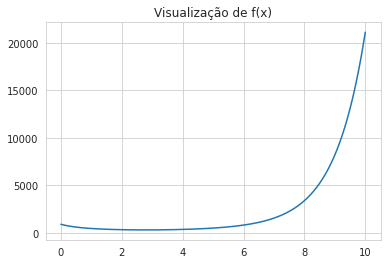

In [ ]:
# Visualização de f(x)
x = np.linspace(0,10,1000)
f_vec = np.vectorize(f)
y = f_vec(x)

plt.title('Visualização de f(x)')
plt.plot(x,y)

Vamos testar uma $f(x)$ que não seja polinomial tal qual:

\begin{equation}
I_f = \int_{-2}^{2} e^{-x^2}dx
\end{equation}



In [ ]:
f = lambda x: math.exp(-(x**2)) 
teste_metodos(f,-2,2, precisao=1e-6)

Método		N	Integral	Erro
scipy.int:	-	1.764163	0.00000000
1/3 Simpson:	20	1.764162	0.00000081
1/3 Simpson:	40	1.764163	0.00000005
1/3 Simpson:	60	1.764163	0.00000001
1/3 Simpson:	100	1.764163	0.00000000
3/8 Simpson:	20	1.764162	0.00000036
3/8 Simpson:	40	1.764163	0.00000002
3/8 Simpson:	60	1.764163	0.00000000
Quadr. GL::	10	1.764163	0.00000027
Quadr. GL::	20	1.764163	0.00000000


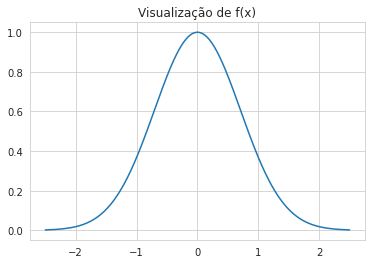

In [ ]:
x = np.linspace(-2.5,2.5,1000)
f_vec = np.vectorize(f)
y = f_vec(x)

plt.title('Visualização de f(x)')
plt.plot(x,y)

\begin{equation}
I_f = \int_{1}^{3} e^xcos(x)dx
\end{equation}

In [ ]:
f = lambda x: math.exp(x) * math.cos(x) 
teste_metodos(f,1,3, precisao=1e-6)

Método		N	Integral	Erro
scipy.int:	-	-10.403054	0.00000000
1/3 Simpson:	40	-10.403054	0.00000009
1/3 Simpson:	60	-10.403054	0.00000002
1/3 Simpson:	100	-10.403054	0.00000000
3/8 Simpson:	20	-10.403054	0.00000064
3/8 Simpson:	40	-10.403054	0.00000004
3/8 Simpson:	60	-10.403054	0.00000001
Quadr. GL::	5	-10.403054	0.00000017
Quadr. GL::	10	-10.403054	0.00000000


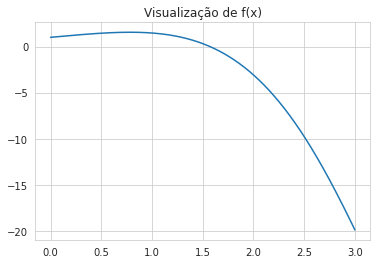

In [ ]:
x = np.linspace(0,3,1000)
f_vec = np.vectorize(f)
y = f_vec(x)
plt.title('Visualização de f(x)')
plt.plot(x,y)

\begin{equation}
I_f = \int_{1}^{3} \dfrac{1}{\sigma \sqrt{2\pi}} exp({-\dfrac{(x-m)^2}{2\sigma^2}})dx
\end{equation}

com $m = 4.0$ e $\sigma = 1.5$

In [ ]:
m = 4.0
sigma = 1.5
f = lambda x: (1/(sigma * math.sqrt(2*math.pi) * math.exp(((x-m)**2/(2*(sigma**2)))) )) 
teste_metodos(f,1,3, precisao=1e-6)

Método		N	Integral	Erro
scipy.int:	-	0.229742	0.00000000
ponto médio:	100	0.229742	0.00000078
ponto médio:	120	0.229742	0.00000054
1/3 Simpson:	10	0.229742	0.00000007
1/3 Simpson:	20	0.229742	0.00000000
3/8 Simpson:	5	0.229742	0.00000051
3/8 Simpson:	10	0.229742	0.00000003
3/8 Simpson:	20	0.229742	0.00000000
Quadr. GL::	5	0.229742	0.00000000


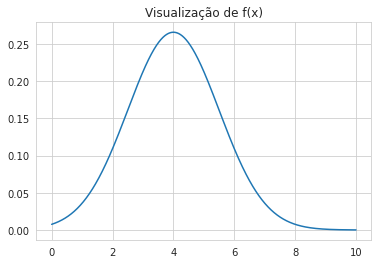

In [ ]:
x = np.linspace(0,10,1000)
f_vec = np.vectorize(f)
y = f_vec(x)
plt.title('Visualização de f(x)')
plt.plot(x,y)

# **Conclusão**

Neste relatório vimos os diferentes métodos existentes para realizar uma integração numérica de funções conhecidas e introduzimos o método de Quadratura de Gauss-Legendre não visto em sala, comparando-o com os outros métodos em diferentes tipos de funções e demonstrando como o mesmo consegue obter resultados superiores aos outros métodos com o uso de poucos nós.